In [109]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("pizza_sales.csv")

In [4]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [7]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
## Data cleaning

In [8]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

## Work on order date

In [12]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['Order_Day'] = df['order_date'].dt.day
df['Order_Month'] = df['order_date'].dt.month
df['Order_Year'] = df['order_date'].dt.year

In [14]:
df.drop('Day', axis = 1 , inplace = True)
df.drop('Month', axis = 1, inplace = True)
df.drop('Year', axis = 1, inplace = True) 

In [16]:
df.drop('order_date', axis = 1 , inplace = True)

In [17]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Order_Day,Order_Month,Order_Year
0,1,1,hawaiian_m,1,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,2015
1,2,2,classic_dlx_m,1,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,2015
2,3,2,five_cheese_l,1,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,2015
3,4,2,ital_supr_l,1,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,2015
4,5,2,mexicana_m,1,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,1,2015


##  work on order time

In [22]:
df['order_time_hr'] = df['order_time'].str.split(':').str[0]
df['order_time_min'] = df['order_time'].str.split(':').str[1]
df['order_time_sec'] = df['order_time'].str.split(':').str[2]

In [25]:
# Convert into object to integer
df['order_time_hr'] = df['order_time_hr'].astype(int)
df['order_time_min'] = df['order_time_min'].astype(int)
df['order_time_sec'] = df['order_time_sec'].astype(int)

In [27]:
df.drop('order_time', axis = 1, inplace = True)

In [29]:
df.shape

(48620, 16)

In [28]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Order_Day,Order_Month,Order_Year,order_time_hr,order_time_min,order_time_sec
0,1,1,hawaiian_m,1,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,2015,11,38,36
1,2,2,classic_dlx_m,1,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,2015,11,57,40
2,3,2,five_cheese_l,1,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,2015,11,57,40
3,4,2,ital_supr_l,1,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,2015,11,57,40
4,5,2,mexicana_m,1,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,1,2015,11,57,40


In [38]:
df['pizza_category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [39]:
df['pizza_size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [40]:
df.drop('unit_price', axis = 1, inplace = True)

In [41]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Order_Day,Order_Month,Order_Year,order_time_hr,order_time_min,order_time_sec
0,1,1,hawaiian_m,1,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,2015,11,38,36
1,2,2,classic_dlx_m,1,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,2015,11,57,40
2,3,2,five_cheese_l,1,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,2015,11,57,40
3,4,2,ital_supr_l,1,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,2015,11,57,40
4,5,2,mexicana_m,1,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,1,2015,11,57,40


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   total_price        48620 non-null  float64
 5   pizza_size         48620 non-null  object 
 6   pizza_category     48620 non-null  object 
 7   pizza_ingredients  48620 non-null  object 
 8   pizza_name         48620 non-null  object 
 9   Order_Day          48620 non-null  int32  
 10  Order_Month        48620 non-null  int32  
 11  Order_Year         48620 non-null  int32  
 12  order_time_hr      48620 non-null  int32  
 13  order_time_min     48620 non-null  int32  
 14  order_time_sec     48620 non-null  int32  
dtypes: float64(1), int32(6), int64(3), object(5)
memory usage: 4.5+ MB


In [43]:
df.describe()

,pizza_id,order_id,quantity,total_price,Order_Day,Order_Month,Order_Year,order_time_hr,order_time_min,order_time_sec
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.0,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.821474,15.461662,6.451131,2015.0,15.911806,29.654936,29.524949
std,14035.529381,6180.119770,0.143077,4.437398,8.809041,3.435420,0.0,3.149836,17.310959,17.235792
min,1.000000,1.000000,1.000000,9.750000,1.000000,1.000000,2015.0,9.000000,0.000000,0.000000
25%,12155.750000,5337.000000,1.000000,12.750000,8.000000,3.000000,2015.0,13.000000,15.000000,15.000000
50%,24310.500000,10682.500000,1.000000,16.500000,15.000000,6.000000,2015.0,16.000000,30.000000,30.000000
75%,36465.250000,16100.000000,1.000000,20.500000,23.000000,9.000000,2015.0,18.000000,45.000000,44.000000
max,48620.000000,21350.000000,4.000000,83.000000,31.000000,12.000000,2015.0,23.000000,59.000000,59.000000


## lets more explore the data

In [51]:
numeric_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

# print columns
print('we have {} numeric features : {}'.format(len(numeric_features), numeric_features))
print('\nwe have {} categorical feature : {}'.format(len(categorical_features), categorical_features))

we have 10 numeric features : ['pizza_id', 'order_id', 'quantity', 'total_price', 'Order_Day', 'Order_Month', 'Order_Year', 'order_time_hr', 'order_time_min', 'order_time_sec']

we have 5 categorical feature : ['pizza_name_id', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']


## Visualization of Data

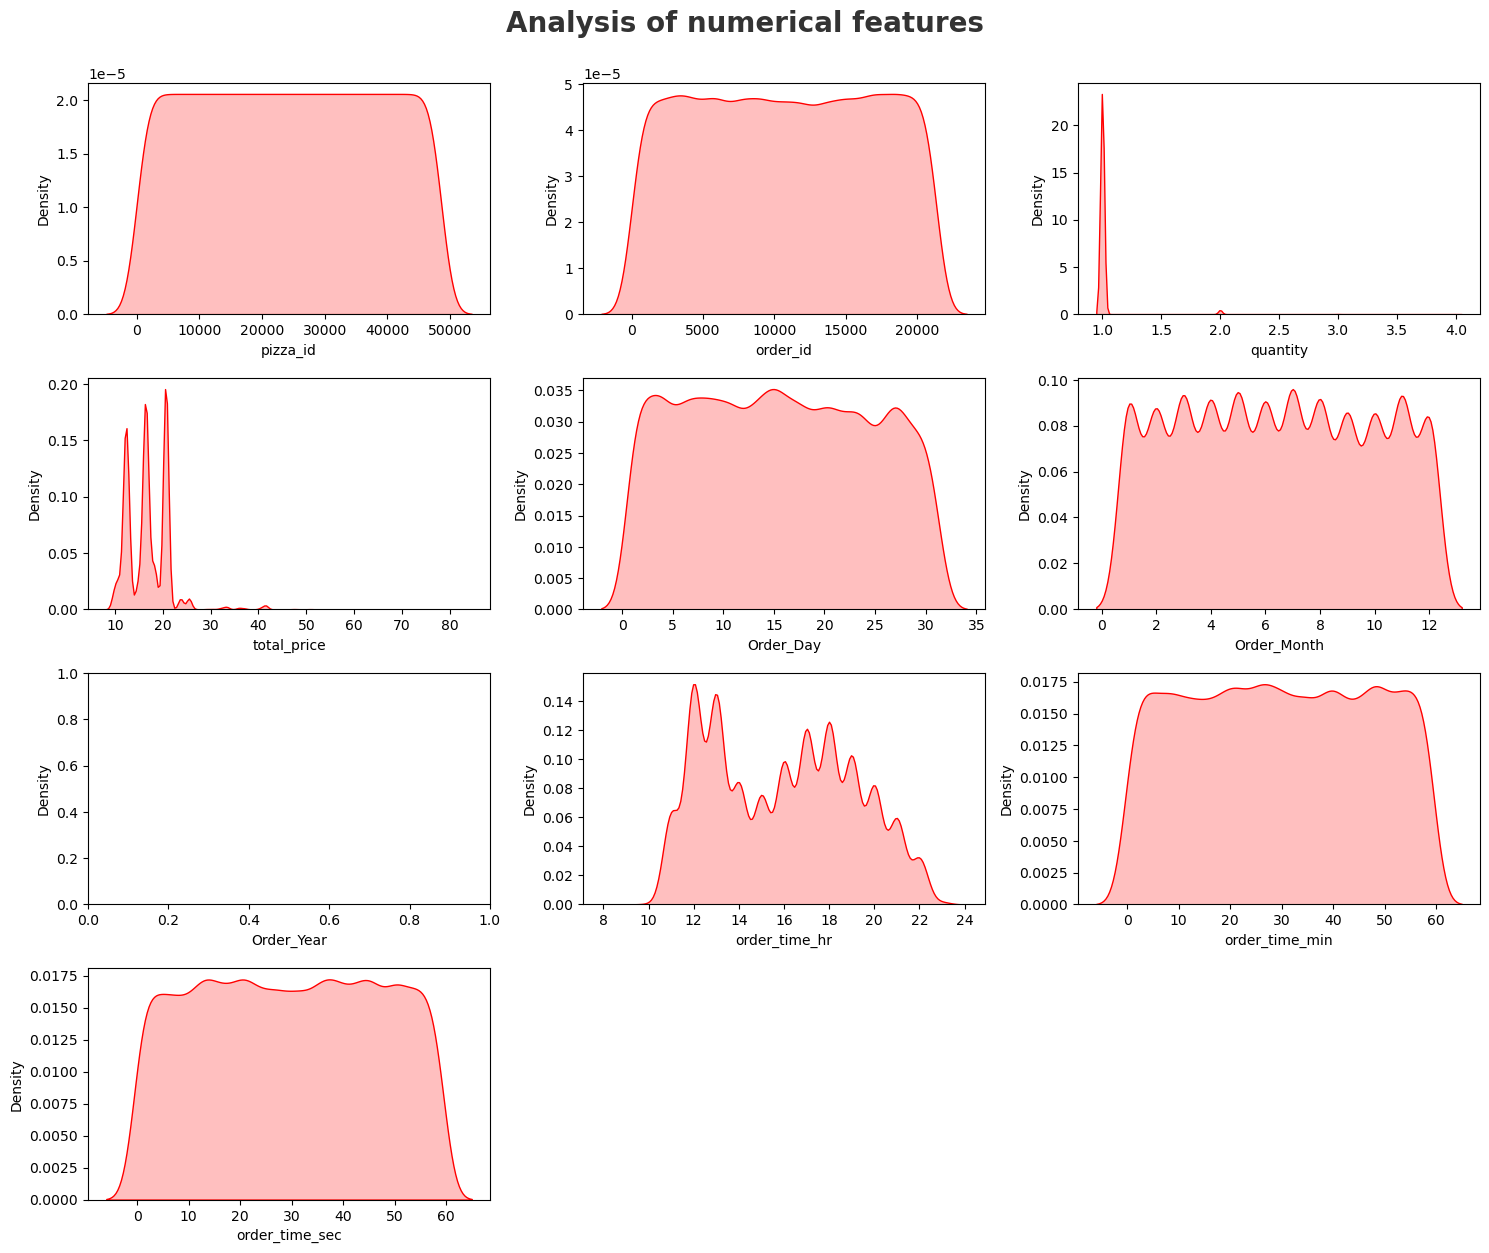

In [53]:
plt.figure(figsize=(15,15))
plt.suptitle('Analysis of numerical features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df[numeric_features[i]], shade = True, color = 'r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

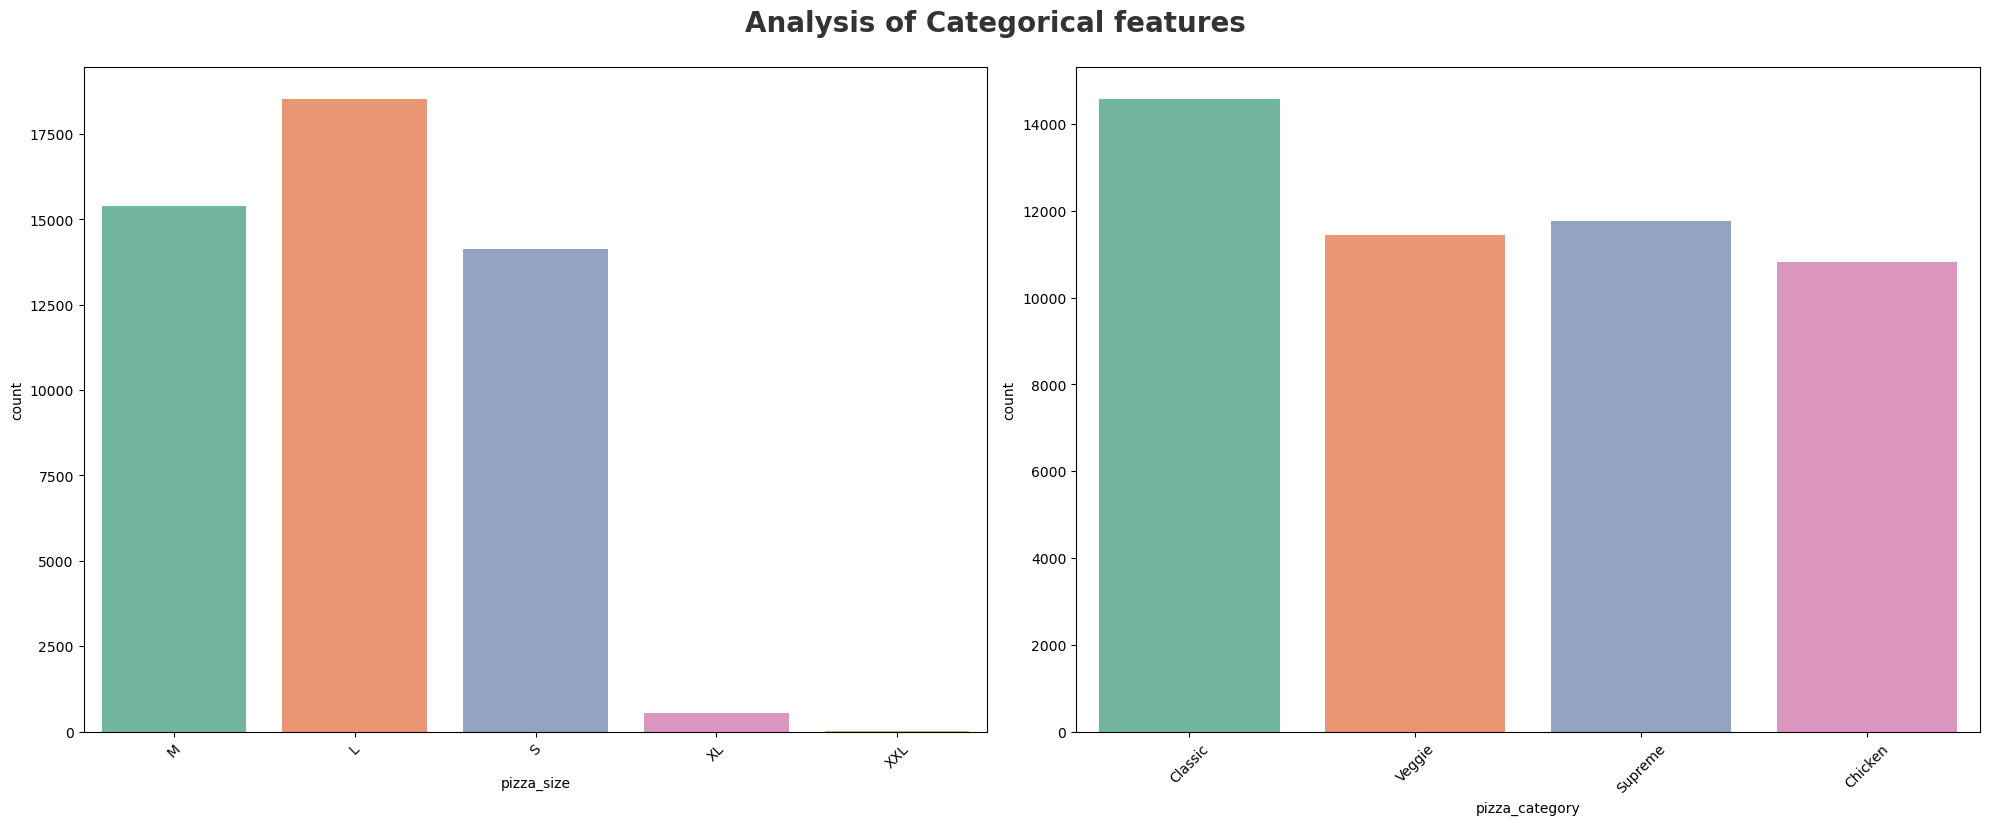

In [60]:
plt.figure(figsize=(20, 15))
plt.suptitle('Analysis of Categorical features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
category = ['pizza_size', 'pizza_category']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Analysis 
* large size classic pizza are more in demand 
* XL size is low in demand
* M size 2nd most in demand
* S size 3rd in demand

* supreme 2nd in demand 
* veggie 3rd in demand
* chiken least in demad but not very badly

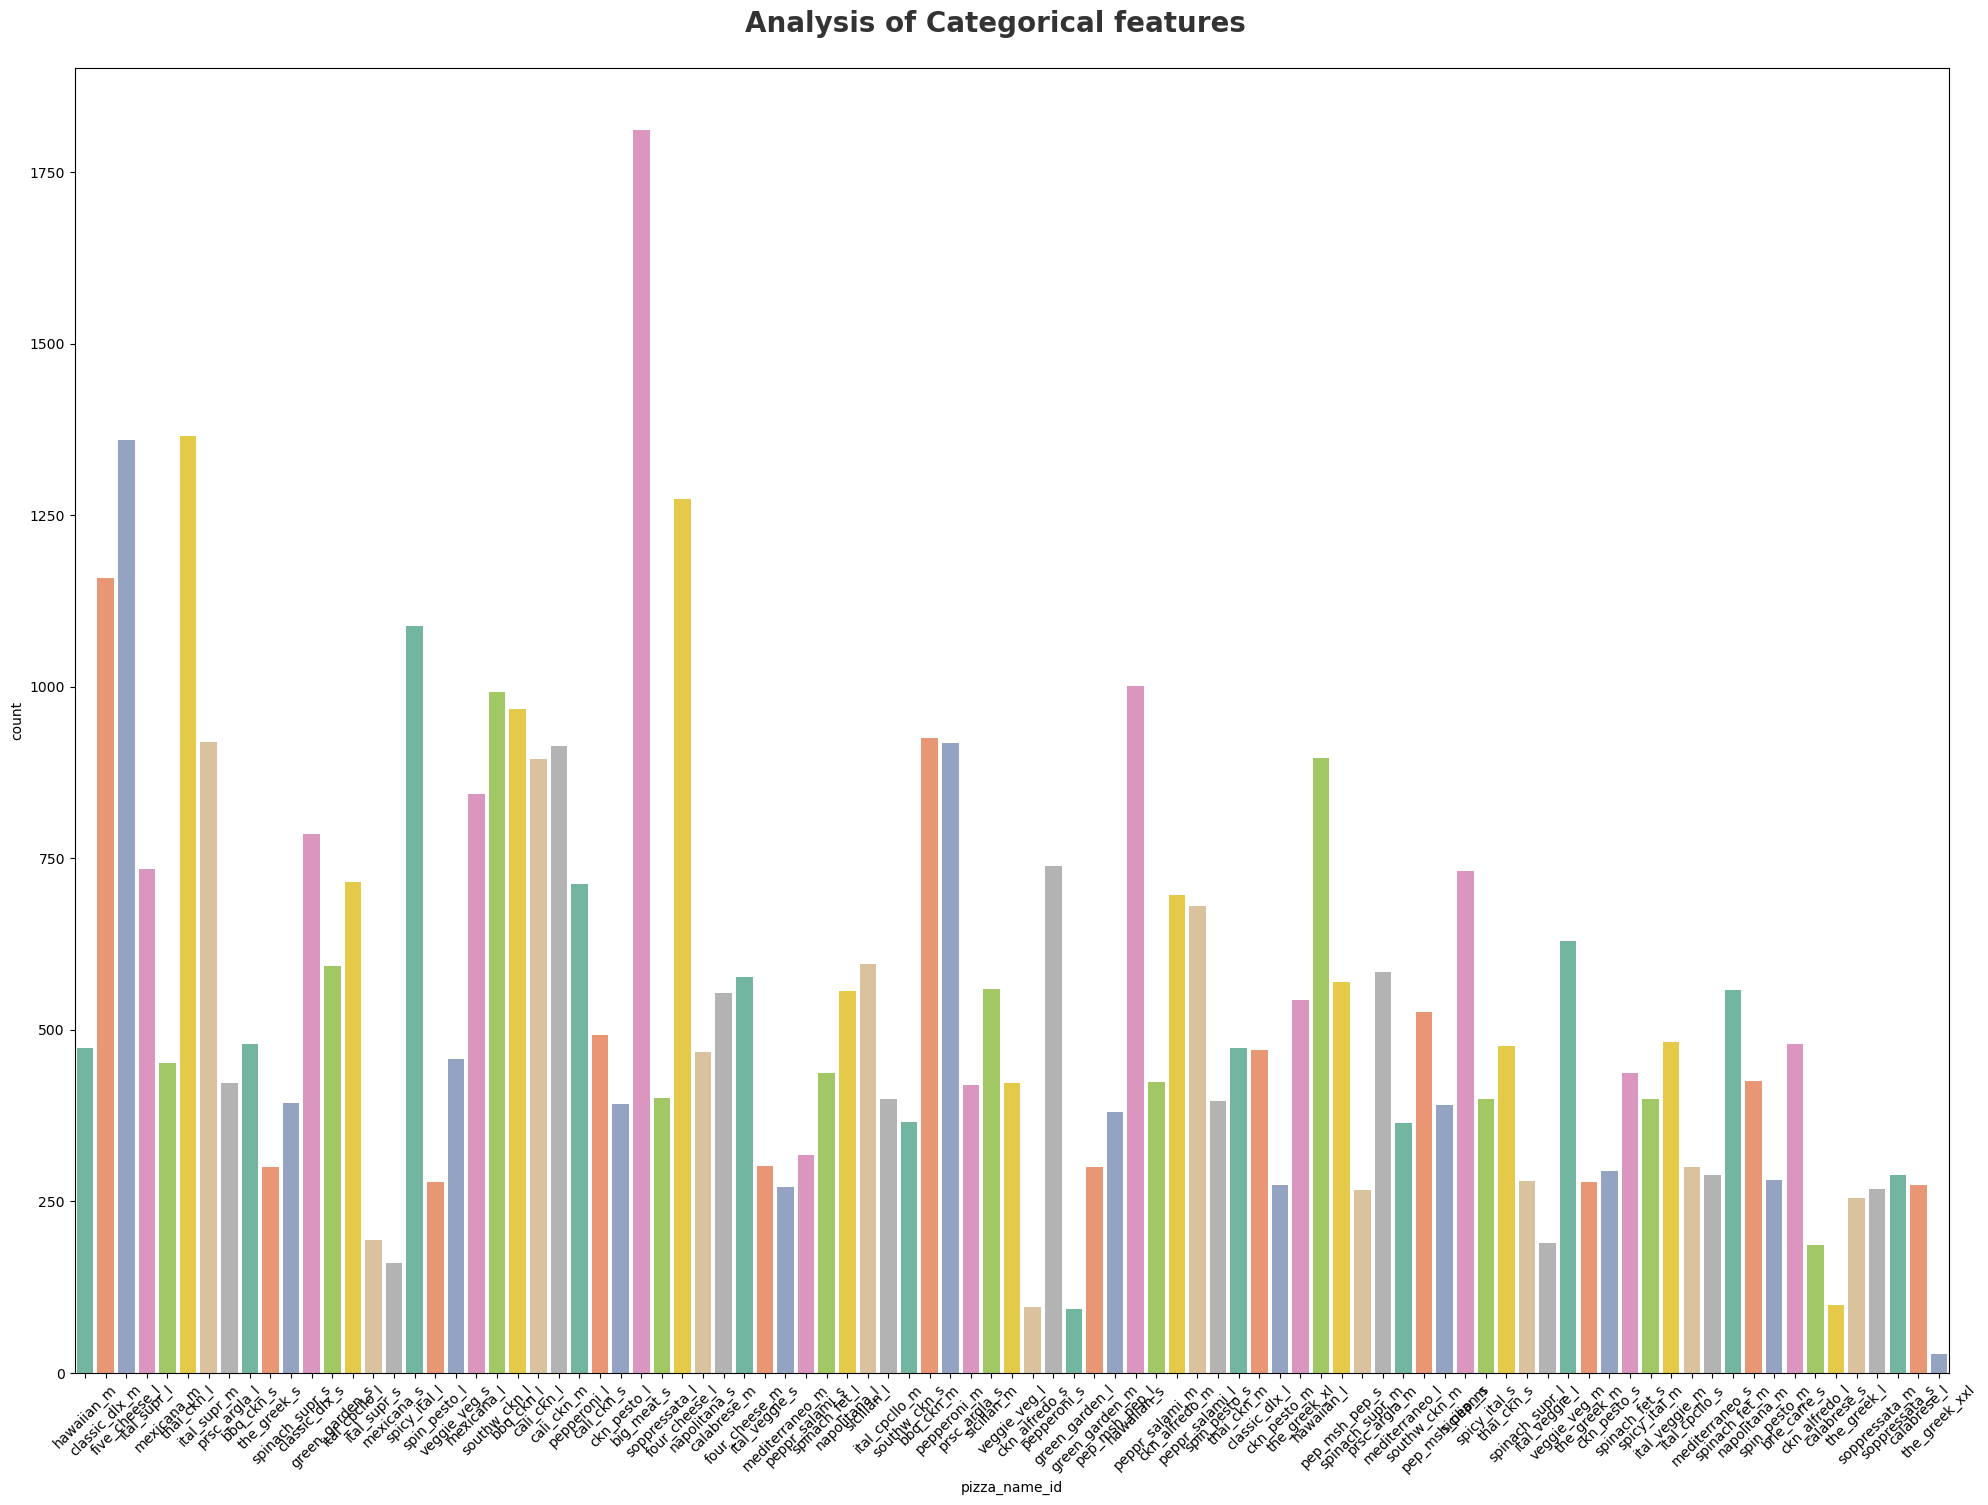

In [62]:
plt.figure(figsize=(20, 15))
plt.suptitle('Analysis of Categorical features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
category = ['pizza_name_id']
for i in range(0, len(category)):
    plt.subplot(1, 1, i+1)
    sns.countplot(x = df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## what are the top 10 most selling pizza with there pizza_name_id

In [67]:
category = pd.DataFrame(df['pizza_name_id'].value_counts())
category.rename(columns = {'Category':'Counts'},inplace=True)

In [68]:
category

,count
pizza_name_id,
big_meat_s,1811
thai_ckn_l,1365
five_cheese_l,1359
four_cheese_l,1273
classic_dlx_m,1159
...,...
mexicana_s,160
calabrese_s,99
ckn_alfredo_s,96


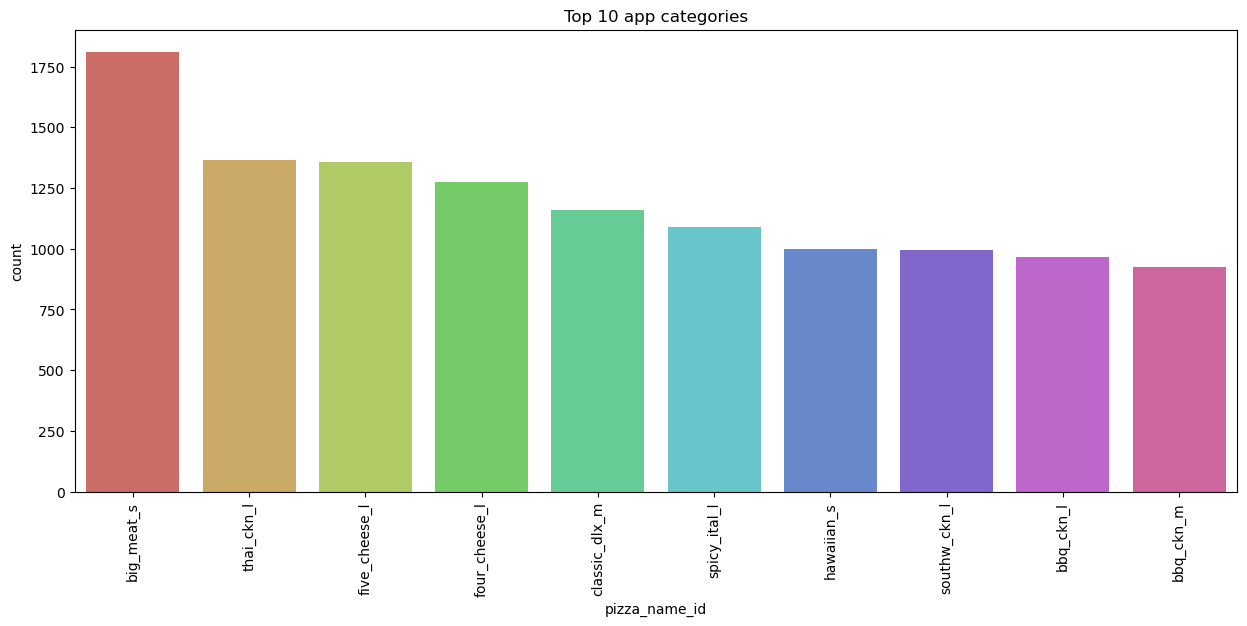

In [69]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y = 'count',data = category[:10],palette='hls')
plt.title('Top 10 app categories')
plt.xticks(rotation=90)
plt.show()

## Analysis of the above pizza_name_id
* big_meat_s is most selling pizza
* bbq_ckn_m is the least selling pizza

## Top 10 most sellling pizza with there name

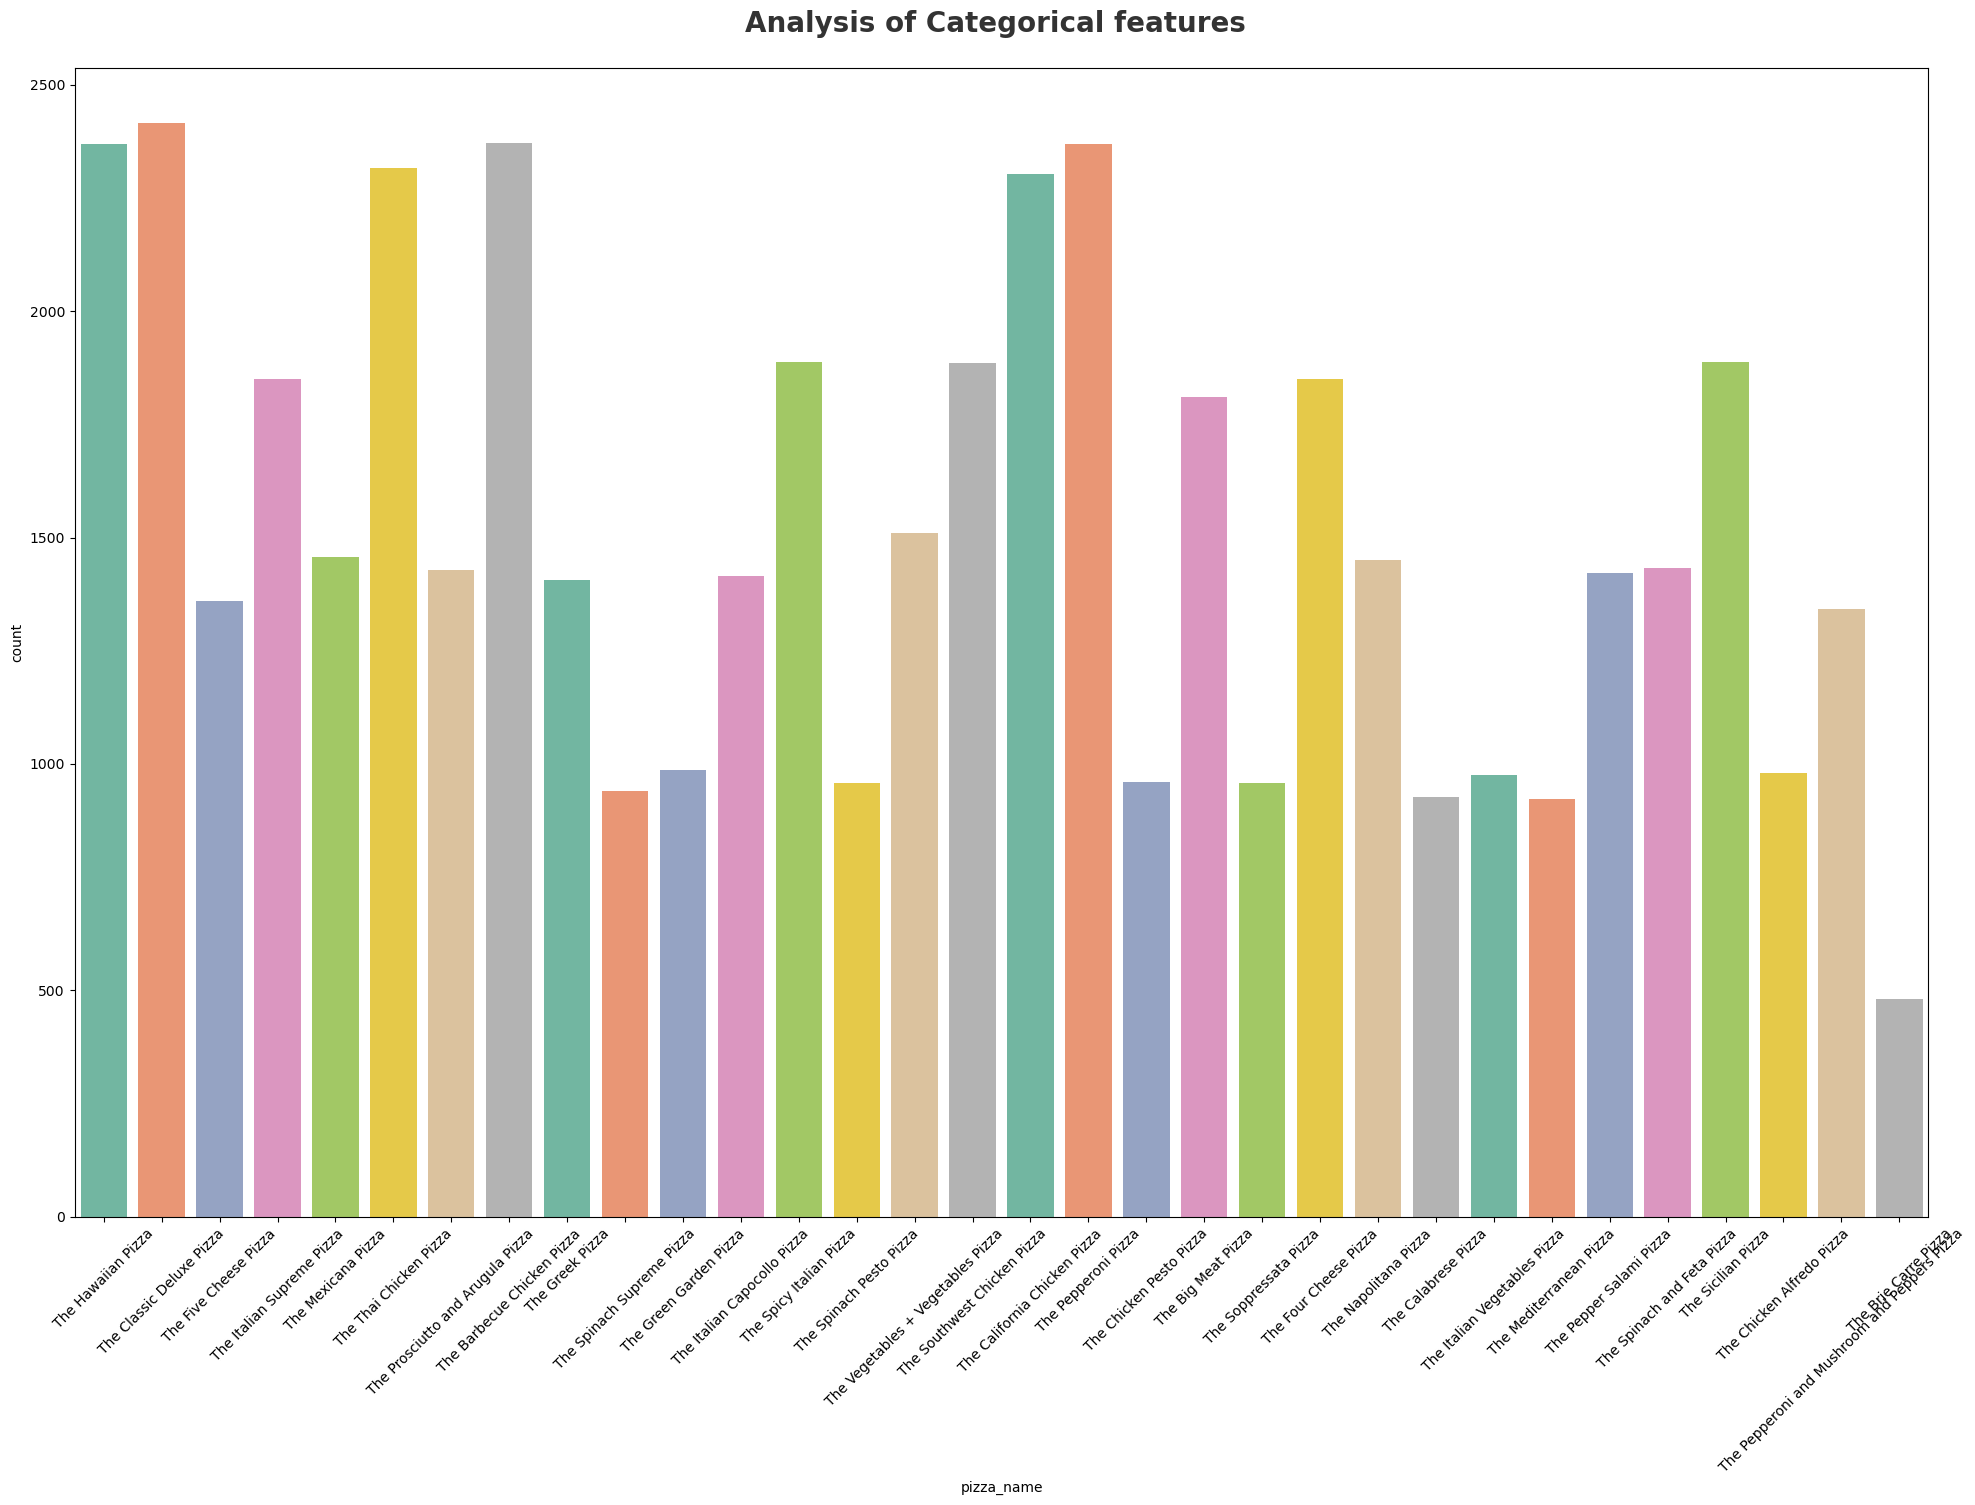

In [70]:
plt.figure(figsize=(20, 15))
plt.suptitle('Analysis of Categorical features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
category = ['pizza_name']
for i in range(0, len(category)):
    plt.subplot(1, 1, i+1)
    sns.countplot(x = df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [71]:
category = pd.DataFrame(df['pizza_name'].value_counts())
category.rename(columns = {'Category':'Counts'},inplace=True)

In [72]:
category

,count
pizza_name,
The Classic Deluxe Pizza,2416
The Barbecue Chicken Pizza,2372
The Hawaiian Pizza,2370
The Pepperoni Pizza,2369
The Thai Chicken Pizza,2315
The California Chicken Pizza,2302
The Sicilian Pizza,1887
The Spicy Italian Pizza,1887
The Southwest Chicken Pizza,1885


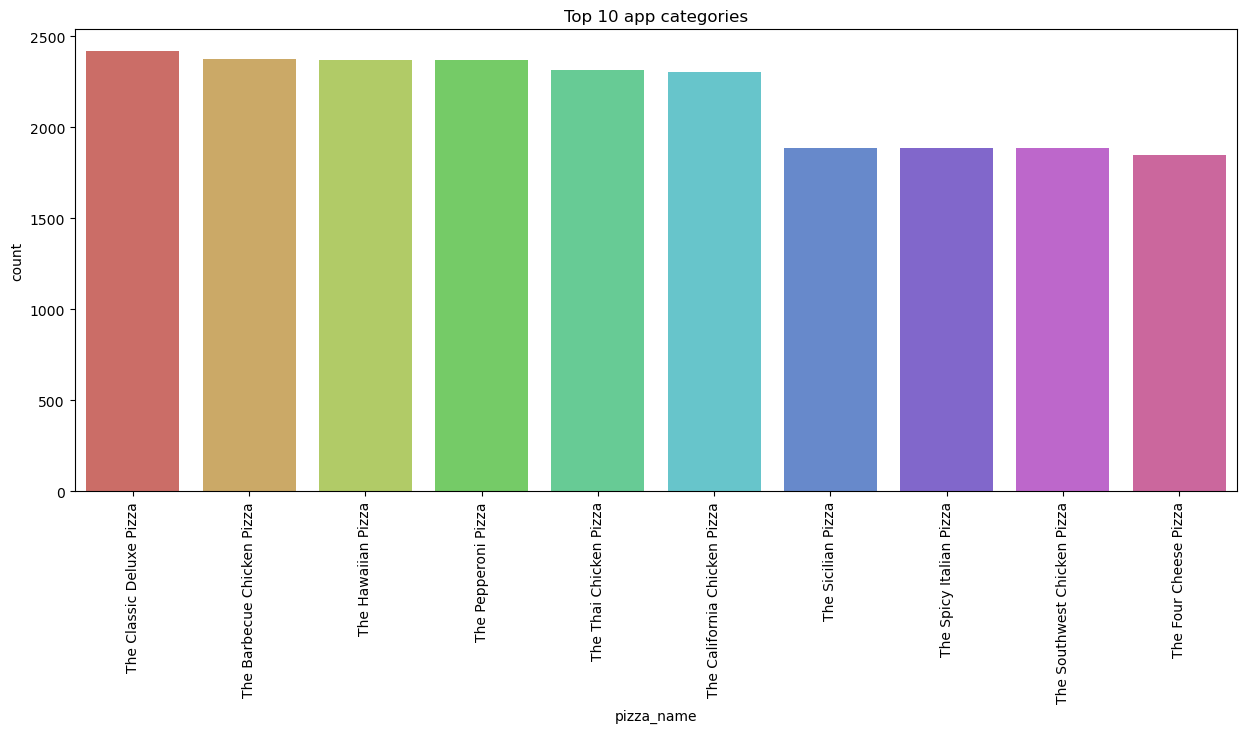

In [73]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y = 'count',data = category[:10],palette='hls')
plt.title('Top 10 app categories')
plt.xticks(rotation=90)
plt.show()

## Analysis of the pizza with tere name 
* The classic Deluxe Pizza is most selling item
* The four cheese pizza is the average selling item
* The Hawaiian Pizza , The Barbecuee Chiken pizza , The pepperoni pizza are the above average selling 

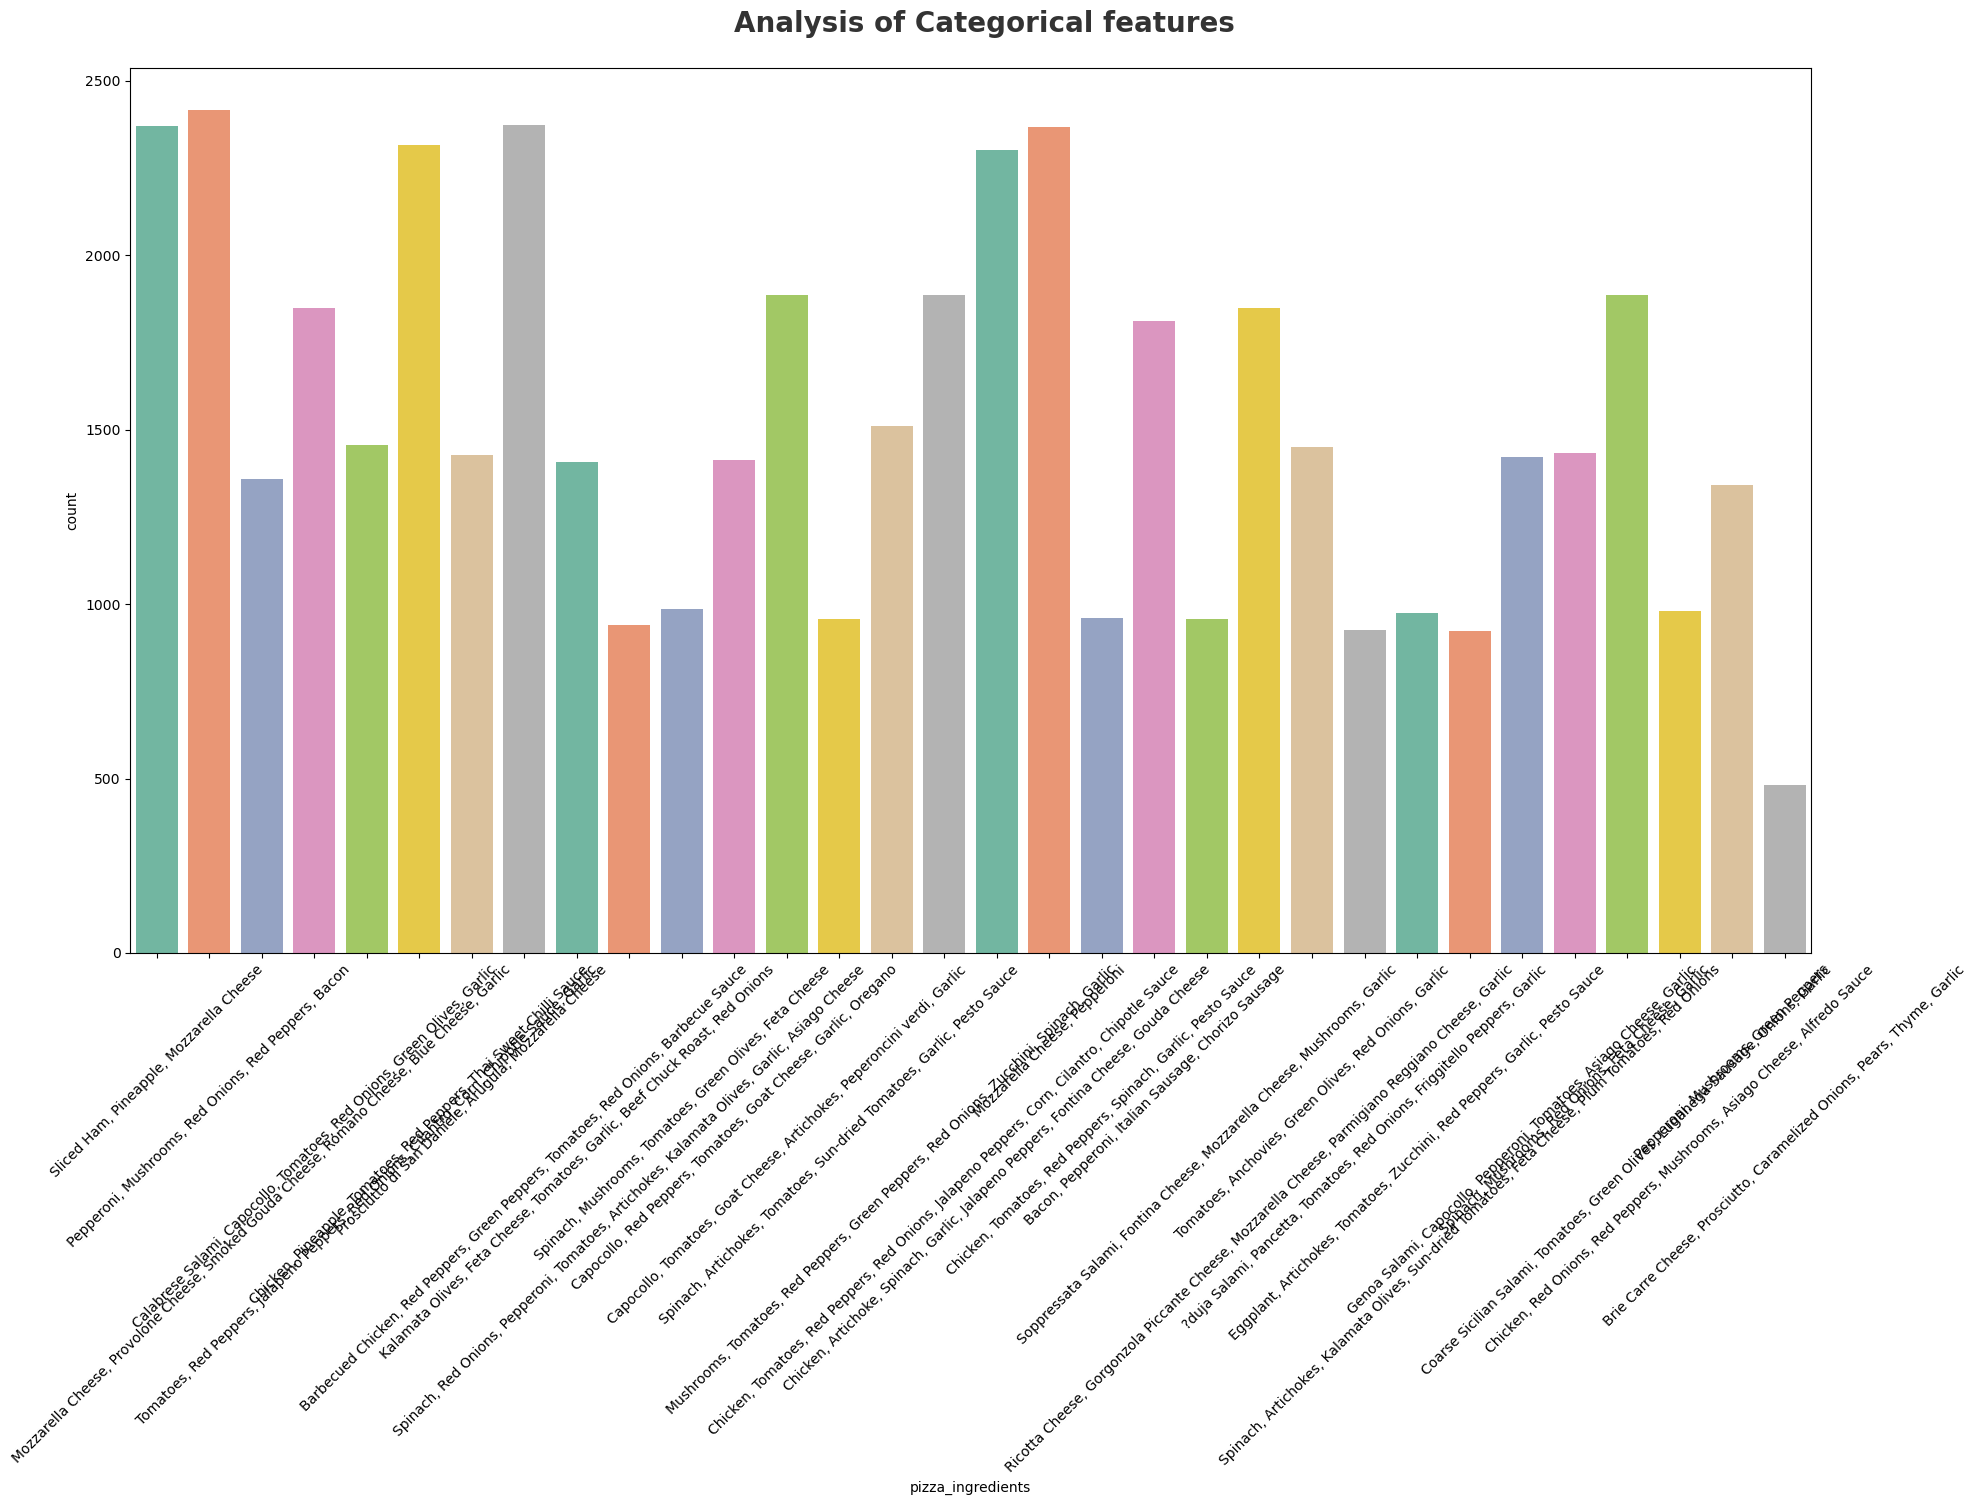

In [76]:
plt.figure(figsize=(20, 15))
plt.suptitle('Analysis of Categorical features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
category = ['pizza_ingredients']
for i in range(0, len(category)):
    plt.subplot(1, 1, i+1)
    sns.countplot(x = df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [95]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Order_Day,Order_Month,Order_Year,order_time_hr,order_time_min,order_time_sec
0,1,1,hawaiian_m,1,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,2015,11,38,36
1,2,2,classic_dlx_m,1,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,2015,11,57,40
2,3,2,five_cheese_l,1,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,2015,11,57,40
3,4,2,ital_supr_l,1,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,2015,11,57,40
4,5,2,mexicana_m,1,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,1,2015,11,57,40
